# <h1> **Лабораторна робота 5**

1.
Для функції $f(x)=sin(x)+x$ скласти таблицю значень, заповнивши таблицю.
    
На основі складеної таблиці побудувати інтерполяційний многочлен Ньютона. 
    
Порівняти значення інтерполяційних поліномів в точках:

$x=g-2k*2.7, g-2k-0.5, g-2k+2.8;$ 
 зі значеннями точної функції, оцінити точність наближення.

In [1]:
import numpy as np

g = 3
k = 8

def f(x):
    return np.sin(x) + x

In [2]:
def get_diff_table(X,Y):
    n=len(X)
    A=np.zeros([n,n])
    
    for i in range(0,n):
        A[i][0] = Y[i]
    
    for j in range(1,n):
        for i in range(j,n):
            A[i][j] = (A[i][j-1] - A[i-1][j-1])/(X[i]-X[i-j])
    
    return A

def newton_interpolation(X,Y,x):
    sum=Y[0]
    temp=np.zeros((len(X),len(X)))
         # 
    for i in range(0,len(X)):
        temp[i,0]=Y[i]
    temp_sum=1.0
    for i in range(1,len(X)):
                 #x polynomial
        temp_sum=temp_sum*(x-X[i-1])
                 # 
        for j in range(i,len(X)):
            temp[j,i]=(temp[j,i-1]-temp[j-1,i-1])/(X[j]-X[j-i])
        sum+=temp_sum*temp[i,i] 
    return sum

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import lagrange as lan

X = np.array([g - 2 * k * 2.7, g - 2 * k - 0.5, g - 2 * k + 2.8], float)
Y = f(X)
A = get_diff_table(X,Y)
df = pd.DataFrame(A)
df



,0,1,2
0,-40.797760,0.000000,0.000000
1,-14.303784,0.992284,0.000000
2,-9.500125,1.455654,0.015446


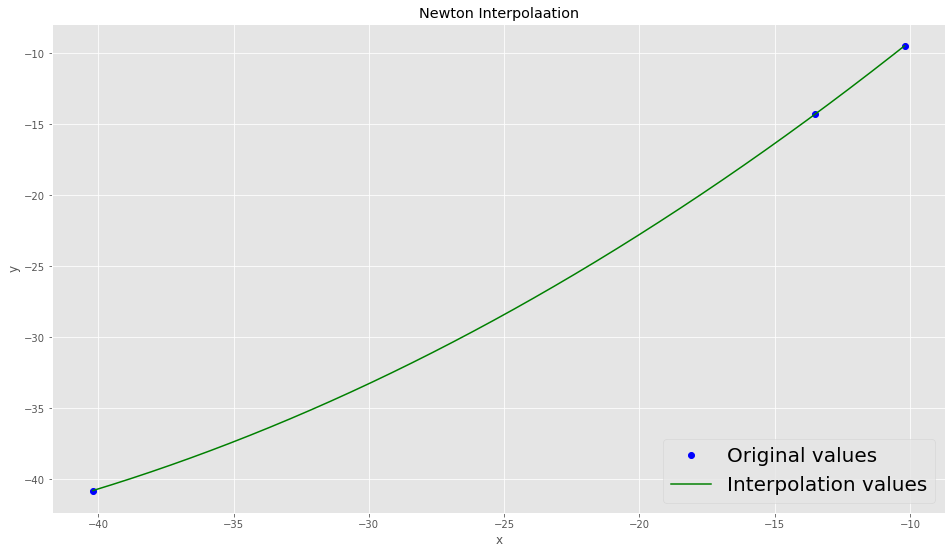

In [9]:
xs=np.linspace(np.min(X),np.max(X),1000,endpoint=True)
ys=[]
for x in xs:
    ys.append(newton_interpolation(X,Y,x))

plt.figure(figsize=(16, 9))
plt.style.use('ggplot')
plt.rcParams['text.color'] = "black"
    
plt.title("Newton Interpolaation")
plt.plot(X,Y,'bo',label="Original values")
plt.plot(xs,ys,'g',label='Interpolation values')
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend(loc=4, prop={'size': 20})